In [3]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
import pandas as pd
import os

In [4]:
log_dir = "./logs/"
os.makedirs(log_dir, exist_ok=True)

In [6]:
env = gym.make("LunarLander-v3", continuous=False, gravity=-10.0,enable_wind=False, wind_power=15.0, turbulence_power=1.5)
env = Monitor(env, log_dir)
env = DummyVecEnv([lambda: env])

In [7]:
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=50000)

Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.7     |
|    ep_rew_mean     | -202     |
| time/              |          |
|    fps             | 1783     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 100         |
|    ep_rew_mean          | -220        |
| time/                   |             |
|    fps                  | 1183        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010232379 |
|    clip_fraction        | 0.054       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_variance   | -0.0024     |
|    learning

In [8]:
# Evaluate agent

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=False)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

Mean reward: -979.7708774 +/- 556.4676568389262


When we wrap a Gymnasium/Stable-Baselines3 environment with Monitor, it creates a CSV log (monitor.csv) with 3 columns.
- r: total reward obtained in the episode.
- l: episode length
- t: time - wall-clock time in seconds since the monitor started logging

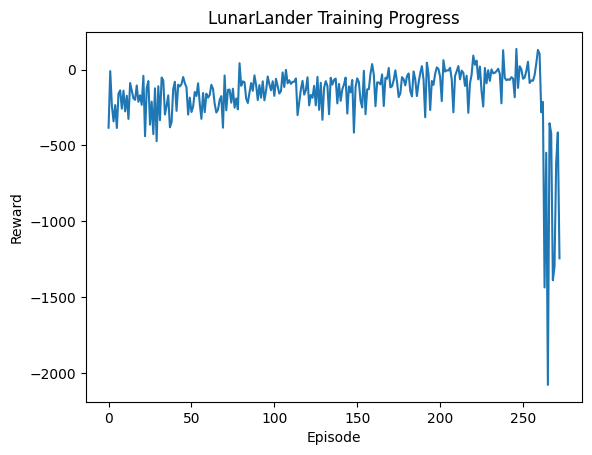

In [ ]:
# Plot rewards over time
log_data = pd.read_csv(os.path.join(log_dir, "monitor.csv"), skiprows=1)

plt.plot(log_data["r"])
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("LunarLander Training Progress")
plt.show()

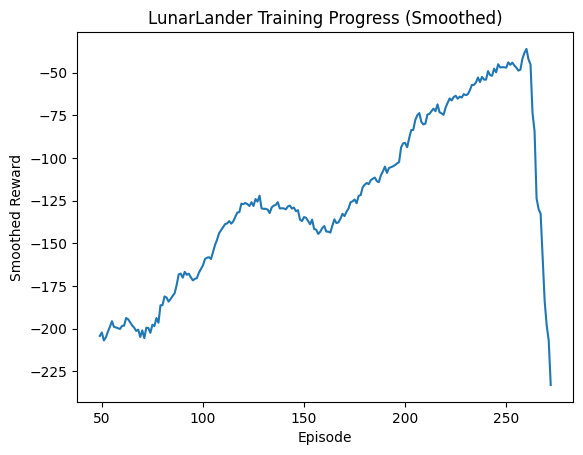

In [10]:
window = 50
smoothed_rewards = log_data["r"].rolling(window).mean()

plt.plot(smoothed_rewards)
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward")
plt.title("LunarLander Training Progress (Smoothed)")
plt.show()

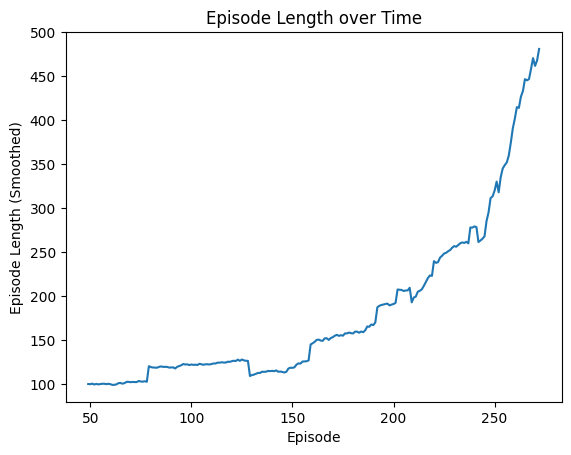

In [ ]:
# visualize if the agent is staying alive longer as the training progresses

plt.plot(log_data["l"].rolling(50).mean())
plt.xlabel("Episode")
plt.ylabel("Episode Length (Smoothed)")
plt.title("Episode Length over Time")
plt.show()